In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sci
import scipy.constants as constants
import scipy.optimize as opt

In [2]:
h = constants.h
c = constants.c
e = constants.e
k = constants.k

In [3]:
def Energy(wl):
    return h*c/(wl*1e-9*e)

def wl(E):
    return h*c/(E*e*1e-9)

In [4]:
T_12 = pd.read_csv("T=12.4", header=2, sep='\t')
T_16 = pd.read_csv("T=16.9", header=2, sep='\t')
T_22 = pd.read_csv("T=22.0", header=2, sep='\t')
T_27 = pd.read_csv("T=27.0", header=2, sep='\t')
T_32 = pd.read_csv("T=32.0", header=2, sep='\t')
T_37 = pd.read_csv("T=37.0", header=2, sep='\t')
T_42 = pd.read_csv("T=42.0", header=2, sep='\t')
T_47 = pd.read_csv("T=47.0", header=2, sep='\t')
T_52 = pd.read_csv("T=52.0", header=2, sep='\t')
T_57 = pd.read_csv("T=57.0", header=2, sep='\t')
T_62 = pd.read_csv("T=62.0", header=2, sep='\t')
T_67 = pd.read_csv("T=67.0", header=2, sep='\t')
T_77 = pd.read_csv("T=77.0_1mV", header=2, sep='\t')
T_87 = pd.read_csv("T=87.0_2", header=2, sep='\t')
T_97 = pd.read_csv("T=97.0", header=2, sep='\t')
T_107 = pd.read_csv("T=107.0", header=2, sep='\t')

In [5]:
df_list = [T_12, T_16, T_22, T_27, T_32, T_37, T_42, T_47, T_52, T_57, T_62, T_67, T_77, T_87, T_97, T_107]
T_list = [12.4, 16.0, 22.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 77.0, 87.0, 97.0, 107.0]
T_int = [12, 16, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 77, 87, 97, 107]

In [6]:
for df in df_list:
    df.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)

(0.0, 0.158)

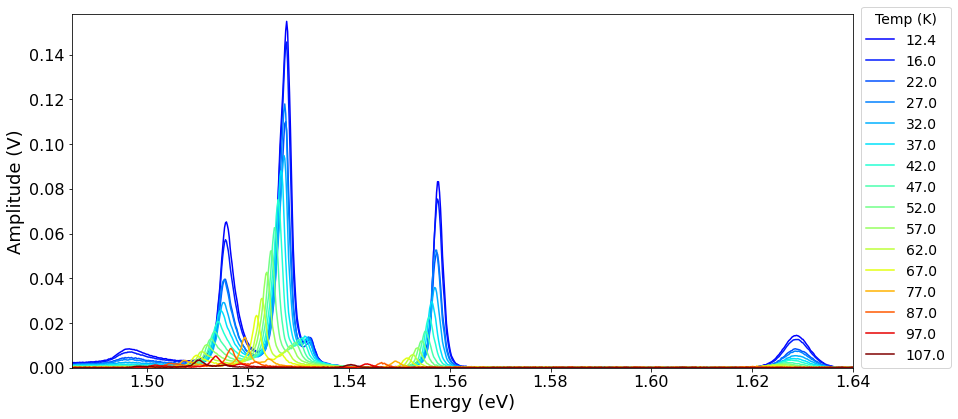

In [7]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.figure(figsize=(14,6.5))
colors = plt.cm.jet(np.linspace(0,1,108))
for df, T, Tcol in zip(df_list,T_list,T_int):
    plt.plot(h*c/(df['Wavelength']*1e-9*e), df['Voltage'], color=colors[Tcol],label=T)
plt.legend(fontsize=14,loc=(1.01,0), title='Temp (K)', title_fontsize=14) 
plt.xlabel('Energy (eV)',size=18)
plt.ylabel('Amplitude (V)',size=18)
plt.xlim([1.485,1.64])
plt.ylim([0,0.158])

In [8]:
def norm(data):
    return [point/max(abs(data)) for point in data]

In [9]:
peaks_array = []

for df in df_list[0:15]:
    peaks_array.append(list(df['Wavelength'][sci.find_peaks(df["Voltage"],prominence=0.0006, distance=25)[0]]))
peaks_array.append(list(T_107['Wavelength'][sci.find_peaks(T_107["Voltage"],prominence=0.0003, distance=25)[0]]))

In [10]:
peak_4nm = [peaks_array[i][0] for i in range(0,13)]

In [11]:
peak_10nm = [peaks_array[i][1] for i in range(0,13)]
peak_10nm.append(peaks_array[13][0])
peak_10nm.append(peaks_array[14][0])
peak_10nm.append(peaks_array[15][0])

In [12]:
peak_80nm = [peaks_array[i][-2] for i in range(0,6)]
for i in range(6,16):
    peak_80nm.append(peaks_array[i][-1])

In [13]:
peak_20nm = [peaks_array[0][3], peaks_array[1][2], peaks_array[2][2]]
for i in range(3,13):
    peak_20nm.append(peaks_array[i][3])
for i in range(13,16):
    peak_20nm.append(peaks_array[i][2])

In [14]:
def heights(df, prom):
    return sci.peak_prominences(df['Voltage'], sci.find_peaks(df["Voltage"],prominence=prom, distance=25)[0])[0]

In [15]:
def Eg_Bulk (T):
    return 1.519 - 5.408e-4*T**2/((T + 204))

In [25]:
def polynomial(x, *args):
    total = []
    for i, value in enumerate(args):
        total.append(x**i*value)
    return sum(total)    

curve_80nm = opt.curve_fit(polynomial, T_list, [(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_80nm, T_list)], p0=[0]*3)[0]
curve_20nm = opt.curve_fit(polynomial, T_list, [(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_20nm, T_list)], p0=[0]*3)[0]
curve_10nm = opt.curve_fit(polynomial, T_list, [(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_10nm, T_list)], p0=[0]*3)[0]

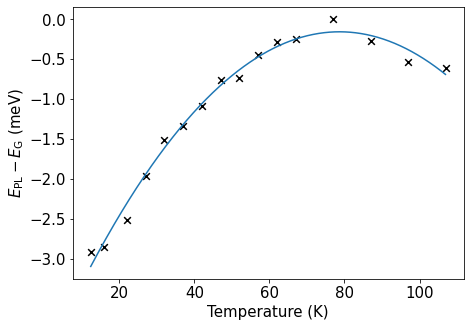

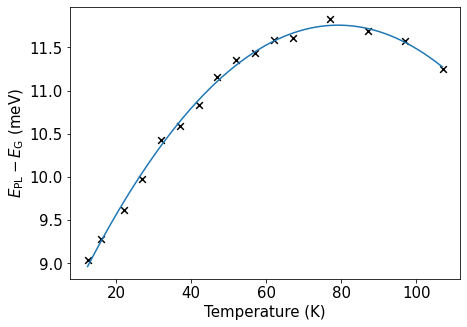

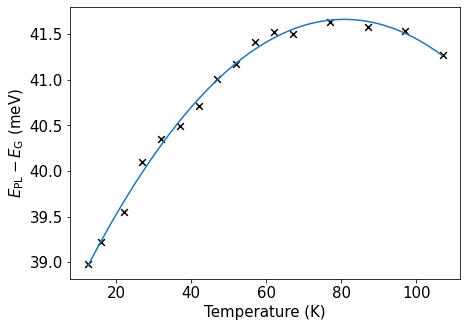

In [30]:
plt.figure(figsize=(7,5))
plt.plot(list(np.arange(12.4,107,0.1)),[
    polynomial(x, *curve_80nm) for x in list(np.arange(12.4,107,0.1))])
plt.scatter(T_list,[(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_80nm, T_list)], marker='x',
           s=45, color='k')
plt.ylabel('$E_{\mathrm{PL}} - E_{\mathrm{G}}$ (meV)',size=15)
plt.xlabel('Temperature (K)',size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(list(np.arange(12.4,107,0.1)),[
    polynomial(x, *curve_20nm) for x in list(np.arange(12.4,107,0.1))])
plt.scatter(T_list,[(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_20nm, T_list)], marker='x',
           s=45, color='k')
plt.ylabel('$E_{\mathrm{PL}} - E_{\mathrm{G}}$ (meV)',size=15)
plt.xlabel('Temperature (K)',size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(list(np.arange(12.4,107,0.1)),[
    polynomial(x, *curve_10nm) for x in list(np.arange(12.4,107,0.1))])
plt.scatter(T_list,[(Energy(peak) - Eg_Bulk(T))*1000 for peak, T in zip(peak_10nm, T_list)], marker='x',
           s=45, color='k')
plt.ylabel('$E_{\mathrm{PL}} - E_{\mathrm{G}}$ (meV)',size=15)
plt.xlabel('Temperature (K)',size = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [54]:
Eb_20 = 79.2*k*1000/e
Eb_10 = 80.8*k*1000/e
Eb_80 = 78.7*k*1000/e

Eb_10, Eb_20, Eb_80

(6.962805275813304, 6.824927943618982, 6.7818412773082555)

In [55]:
Eb_20_err = (79.2 + 2)*k*1000/e -79.2*k*1000/e
Eb_10_err = (80.8 + 2)*k*1000/e -80.8*k*1000/e
Eb_80_err = (78.7 + 2)*k*1000/e -78.7*k*1000/e

Eb_10_err, Eb_20_err, Eb_80_err

(0.17234666524290354, 0.17234666524290354, 0.17234666524290443)